In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('../data/ai case study.csv', names=['User_Id', 'Product_Id', 'Rating', 'Timestamp'])
data.head()

,User_Id,Product_Id,Rating,Timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [7]:
print("Number of ratings: ",len(data))
print("Number of users: ", data.User_Id.nunique())
print("Number of products: ", data.Product_Id.nunique())

Number of ratings:  7824482
Number of users:  4201696
Number of products:  476002


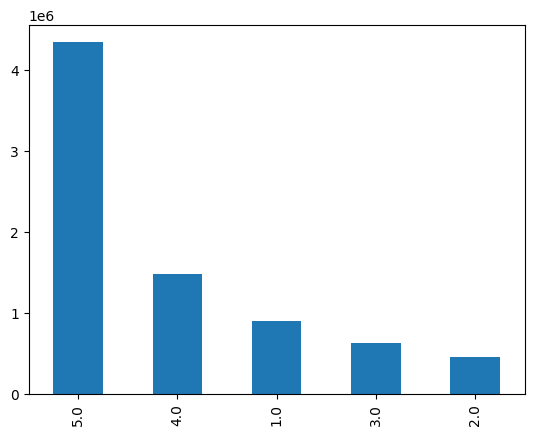

In [13]:
data.Rating.value_counts().plot.bar()
plt.show()

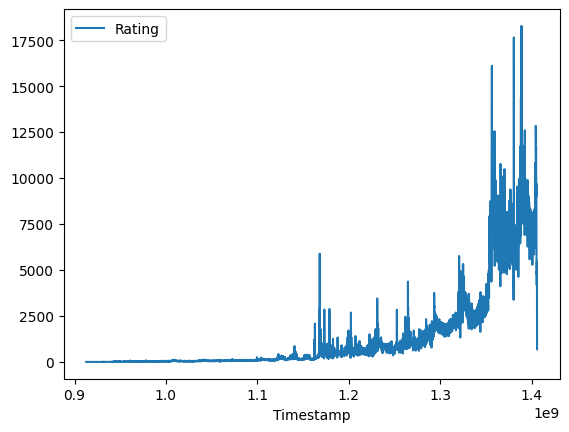

In [20]:
data[['Timestamp', 'Rating']].groupby(['Timestamp']).count().plot()
plt.show()

<Axes: >

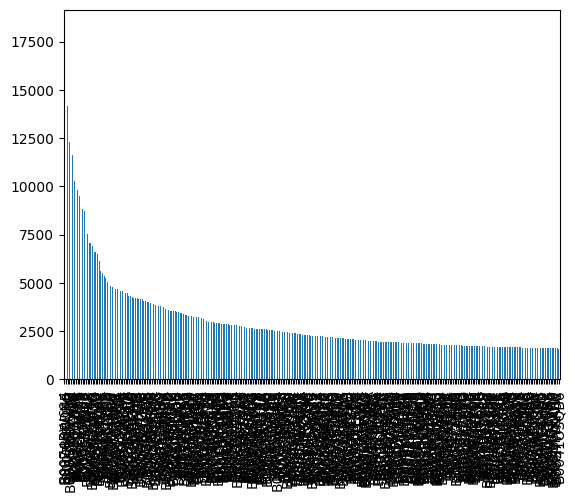

In [29]:
data.Product_Id.value_counts().head(300).plot.bar()

<Axes: xlabel='Rating'>

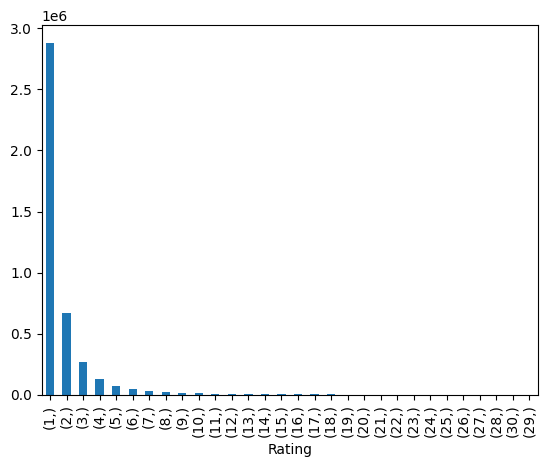

In [38]:
data[['User_Id', 'Rating']].groupby(['User_Id']).count().value_counts().head(30).plot.bar()

<Axes: xlabel='Rating'>

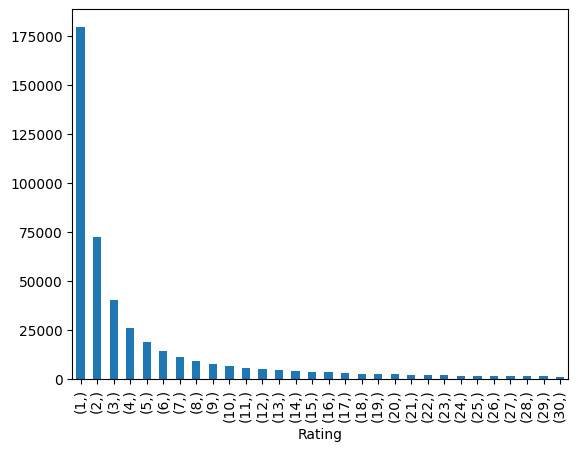

In [40]:
data[['Product_Id', 'Rating']].groupby(['Product_Id']).count().value_counts().head(30).plot.bar()

In [41]:
def normalize(x):
    x = x.astype(float)
    x_sum = x.sum()
    x_num = x.astype(bool).sum()
    x_mean = x_sum / x_num

    if x_num == 1 or x.std() == 0:
        return 0.0
    return (x - x_mean) / (x.max() - x.min())

In [43]:
data['Rating'] = data['Rating'].astype(float)
data['Average_Rating'] = data.groupby('User_Id')['Rating'].transform(lambda x: normalize(x))
data['User_Id'] = data['User_Id'].astype('category')
data['Product_Id'] = data['Product_Id'].astype('category') 

In [44]:
data.head()

,User_Id,Product_Id,Rating,Timestamp,Average_Rating
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200,0.00
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800,0.25
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600,0.00
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200,0.00
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200,0.00


In [343]:
data['Product_Id'].cat.codes

0               0
1               1
2               2
3               2
4               2
            ...  
7824477    476000
7824478    476000
7824479    476000
7824480    476000
7824481    476001
Length: 7824482, dtype: int32

In [46]:
from scipy.sparse import coo_matrix

In [47]:
coo = coo_matrix((data['Average_Rating'].astype(float), (data['Product_Id'].cat.codes.copy(), data['User_Id'].cat.codes.copy())))

In [48]:
data['Average_Rating']

0          0.000000
1          0.250000
2          0.000000
3          0.000000
4          0.000000
             ...   
7824477    0.000000
7824478    0.000000
7824479    0.092105
7824480    0.000000
7824481    0.484848
Name: Average_Rating, Length: 7824482, dtype: float64

In [49]:
overlap_matrix = coo.astype(bool).astype(int).dot(coo.transpose().astype(bool).astype(int))

In [ ]:
overlap_matrix.

In [50]:
from sklearn.metrics.pairwise import cosine_similarity

In [316]:
min_sim = 0.05
min_overlap=15
cor = cosine_similarity(coo, dense_output=False)
cor = cor.multiply(cor > min_sim)
cor = cor.multiply(overlap_matrix > min_overlap)

In [235]:
products = dict(enumerate(data['Product_Id'].cat.categories))
products = {v: k for k, v in products.items()}

In [233]:
products

{0: '0132793040',
 1: '0321732944',
 2: '0439886341',
 3: '0511189877',
 4: '0528881469',
 5: '0558835155',
 6: '059400232X',
 7: '0594012015',
 8: '0594017343',
 9: '0594017580',
 10: '0594033896',
 11: '0594033926',
 12: '0594033934',
 13: '0594202442',
 14: '0594287995',
 15: '0594296420',
 16: '0594450209',
 17: '0594450705',
 18: '0594451647',
 19: '0594477670',
 20: '0594478162',
 21: '0594481813',
 22: '0594481902',
 23: '0594482127',
 24: '0594511488',
 25: '0594514681',
 26: '0594514789',
 27: '0594549507',
 28: '0594549558',
 29: '0743610431',
 30: '0777700018',
 31: '0840017677',
 32: '0879393742',
 33: '089933623X',
 34: '0899336795',
 35: '094339676X',
 36: '0970407998',
 37: '0970408005',
 38: '0972683275',
 39: '0977703037',
 40: '0978770382',
 41: '0979526191',
 42: '0983947600',
 43: '0986987662',
 44: '1034385789',
 45: '1039869017',
 46: '1085901386',
 47: '1094441252',
 48: '1182702627',
 49: '1254875778',
 50: '134048160X',
 51: '1348510390',
 52: '1394860919',
 53

In [216]:
np.random.seed(115)
user_id = data.User_Id.sample(1).values[0]
user_id

'A3M4TXOOV62F19'

In [217]:
active_user_items = data[data.User_Id == user_id].sort_values(by=['Rating', 'Timestamp'], ascending=[False, False])[:100].to_dict('records')
active_user_items

[{'User_Id': 'A3M4TXOOV62F19',
  'Product_Id': 'B000EN0K94',
  'Rating': 5.0,
  'Timestamp': 1373673600,
  'Average_Rating': 0.5},
 {'User_Id': 'A3M4TXOOV62F19',
  'Product_Id': 'B000NM8DI6',
  'Rating': 4.0,
  'Timestamp': 1373673600,
  'Average_Rating': -0.5}]

In [218]:
type(active_user_items)

list

In [219]:
product_ids = {product['Product_Id']: product['Rating'] for product in active_user_items}
product_ids

{'B000EN0K94': 5.0, 'B000NM8DI6': 4.0}

In [220]:
user_mean = sum(product_ids.values()) / len(product_ids)
user_mean

4.5

In [93]:
cor[, :]

<2x476002 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [97]:
cor[[products[product_id] for product_id in product_ids], :]

<6x476002 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [349]:
min_sim = 0.01
min_overlap=1
cor = cosine_similarity(coo, dense_output=False)
cor = cor.multiply(cor > min_sim)
cor = cor.multiply(overlap_matrix > min_overlap)

min_sim = 0.05
user_id = data.User_Id.sample(1).values[0]
active_user_items = data[data.User_Id == user_id].sort_values(by=['Rating', 'Timestamp'], ascending=[False, False])[:100].to_dict('records')
product_ids = {product['Product_Id']: product['Rating'] for product in active_user_items}
for product_id in product_ids:
    print(products[product_id])
    product_cor = cor[products[product_id], :]
    sorted_args = np.array((-product_cor.todense()).argsort()).flatten()
    p = []
    q = []
    for s in sorted_args[:10]:
        # print(s)
        c = np.array(product_cor.todense()).flatten()[s]
        # print(c)
        if ((s == products[product_id]) or (c == 0)):
            continue
        p.append(s)
        q.append(c)
    print(p)
    print(q)

424225
[]
[]
464213
[237177, 439517, 348729, 332275, 266168, 380919, 267933, 470359, 141367]
[0.13072864295678607, 0.11845777547824865, 0.09390824479976598, 0.039375259538227736, 0.03078804951803387, 0.02908725629815978, 0.027928627441527732, 0.02508609653758233, 0.022647082780136708]
83442
[]
[]
81013
[251093, 343487, 323389, 325947]
[0.05158411816923331, 0.015414380722924252, 0.014534136751111672, 0.011256017394475827]
312347
[158308]
[0.012791747377350456]
418770
[395043, 473588, 186356]
[0.0250291469152396, 0.012739198115608981, 0.010647250824838006]
109725
[105992, 338065, 393934]
[0.02182912898571077, 0.015317973141076208, 0.012640583893404361]
339454
[386605, 324662, 257145, 20899, 326250, 371753, 412862, 313081, 375937]
[0.02975013663738964, 0.02401985618091574, 0.016933697863448584, 0.016154402834998277, 0.015322626739319225, 0.013599004612895448, 0.011857030405356425, 0.01039205329702847, 0.010320869719784301]
399272
[412500, 131238, 385474, 328202]
[0.014891437367480023, 0.0

In [212]:
from tqdm import tqdm

In [213]:
min_sim = 0.2
active_products_cor = cor[[products[product_id] for product_id in product_ids], :]
for product_cor in active_products_cor:
    # product_cor[product_cor < min_sim] = 0
    # print(product_cor.shape)
    # # print(product_cor)
    # print((-product_cor.todense()).argsort())
    # print(product_cor.todense().reshape(-1, 1))
    # print((-product_cor.todense()).argsort().shape)
    # a = (-product_cor.todense()).argsort()
    # print((-product_cor.todense()).argsort())
    a = np.array((-product_cor.todense()).argsort()).flatten()
    for index in tqdm(a):
        # print(index)
        # print(np.array(product_cor.todense()).flatten())
        sim = np.array(product_cor.todense()).flatten()[index]
        # print(sim)
        if (sim < min_sim):
            continue
        print(index, sim)

  0%|                                      | 185/476002 [00:00<08:38, 918.12it/s]

14286 1.0000000000000004


  0%|                                     | 1366/476002 [00:01<10:12, 775.23it/s]


KeyboardInterrupt: 

In [ ]:
min_sim = 0.2
active_products_cor = cor[[products[product_id] for product_id in product_ids], :]
for product_cor in active_products_cor:
    a = np.array((-product_cor.todense()).argsort()).flatten()
    for index in a:
        sim = np.array(product_cor.todense()).flatten()[index]
        # print(sim)
        if (sim < min_sim):
            continue
        print(index, sim)

In [201]:
min_sim = 0.2

for product_id in product_ids:
    product_index = products[product_id]
    product_cor = cor[product_index, :]
    

(1, 476002)
(1, 476002)
(1, 476002)
(1, 476002)
(1, 476002)
(1, 476002)


In [209]:
[x for x in range(cor.shape[1]) if x not in idx]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [208]:
idx = [products[product_id] for product_id in product_ids]
cor[idx, [x for x in range(cor.shape[1]) if x not in idx]]
cor[idx, :][]

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (475996,).

In [206]:
idx 

[130962, 14286, 388563, 170326, 202111, 205515]

In [202]:
product_index

205515

In [185]:
np.array((-product_cor.todense()).argsort()).flatten()

0

In [180]:
np.array(a)

array([[     0, 317341, 317340, ..., 158659, 158671, 476001]])

In [149]:
np.argsort(np.array([[1, 4, 3]]))

array([[0, 2, 1]])

In [100]:
(cor > min_sum).shape

(476002, 476002)

In [115]:
list(set(products.values()).difference([products[product_id] for product_id in product_ids]))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [122]:
cor[[3, 4, 5], [5, 6]]

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (3,) and arg 1 with shape (2,).

In [114]:
cor[[products[product_id] for product_id in product_ids], list(set(products.values()).difference([products[product_id] for product_id in product_ids]))]

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (475996,).

In [ ]:
cor[[products[product_id] for product_id in product_ids], list(set(products.values()).difference([products[product_id] for product_id in product_ids]))]

In [108]:
[products[product_id] for product_id in product_ids]

[130962, 14286, 388563, 170326, 202111, 205515]

In [109]:
set(products.values()).difference([products[product_id] for product_id in product_ids])

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [123]:
active_cor = cor[[products[product_id] for product_id in product_ids], :]

In [127]:
active_cor[0][active_cor[0] > 0.1]

<1x0 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

<1x476002 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>